# English Alphabet Markov Model
English has 26 alphabet. The distribution of each alphabet that shows as an initial letter is not a uniform distribution. The probability of one alphabet is followed by another alphabet is different too. However, if you have couple text large enough, you will find the initial alphabet distribution and transition probability is quite stable.<br>
<br>
This article will help you to build an alphabet markov transition matrix from scratch. The text we use here for illustration are some free books downloaded from online. Free feel you use your own resources.<br>
<br>
Something maybe helpful but not necessary for this article:<br>
- **Markov chain**: https://en.wikipedia.org/wiki/Markov_chain <br>
- **Transition matrix**: https://en.wikipedia.org/wiki/Stochastic_matrix

In [1]:
# import packages 

import numpy as np
from collections import Counter 
import pandas as pd
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Download books
Books could be downloaded from Gutenberg project (linked below). Feel free to use any text you like!<br>
https://www.gutenberg.org/<br>

## Read books
Define a function to read your books or any other text files.

In [2]:
def read_book(title_path):
    """
    Read a book.
    """
    with open(title_path,"r",encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n","").replace("\r","")
    return text

In [4]:
text1 = read_book("E:/Python/Books/A Tale of Two Cities.txt")
text2 = read_book("E:/Python/Books/The Adventure of Tom Sawyer.txt")
text3 = read_book("E:/Python/Books/The Adventures of Sherlock Holmes.txt")
text4 = read_book("E:/Python/Books/The Whale.txt")
text5 = read_book("E:/Python/Books/War and Peace.txt")
text6 = read_book("E:/Python/Books/Treasure Island.txt")

## Clean the data
Since text is unstructured data, so we need to do some preparation work such as clean the data, remove punctuations, and then we can get a structured word frequency dataframe for further analysis.

In [5]:
# Choose a book to save into a string variable for further analysis, and convert all characters into lower case. 
# You can concatenate multiple books together to get a larger data set.
text = text1.lower()

# create a list contains the major punctuations that we want to skip
skips = [".",":",";","'",",",'"',"!","?","”","“","_","(",")","-","’","  "]

for ch in skips:
    text = text.replace(ch," ")

# Create a dataframe of the word frequency in that book, and sort it    

word_count = Counter(text.split(" "))

text_stat = pd.DataFrame({"word":list(word_count.keys()),
                           "count":list(word_count.values())})

text_stat = text_stat[text_stat.word != ""]

text_stat = text_stat.sort_values(by=['count'], ascending = False)

# Show the top frequency words
text_stat.head()

,word,count
14,the,7170
21,and,4553
4,of,3710
73,to,3245
5,a,2693


You should expect to see words like 'the', 'and', 'of' have the highest frequency. For different analysis purposes, you could choose to keep them or remove them. 

## Word Cloud
A nice visualization for text data is word cloud.

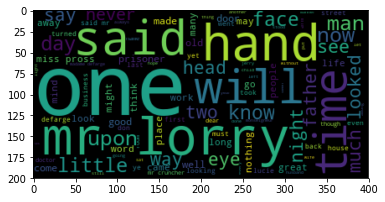

In [11]:
wordcloud = WordCloud(max_words=100).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

## Calculate initial letter distribution and transition matrix
Next step is to use the word frequency dataframe to calculate the alphabet initial distribution and transition matrix. We will first calculate transition frequency matrix and initial frequncy vector, then convert them to a probability matrix and distribution vector. <br>
<br>
The logic is very simple: for example if word 'the' shows 1000 times in the text, for this single word, **t** -> **h** 1000 times, **h** -> **e** 1000 times, we will add 1000 to the corresponding cells in the frequency matrix. Then go to next word and repeat the step above, until we go through all words in the word frequency dataframe.

In [44]:
# Create a string with all lower case alphabet
alp = string.ascii_lowercase

# Initialize a 26*26 transition matrix
s=(26,26)
matrix = pd.DataFrame(np.zeros(s))

# Initialize a 26*1 initial letter vector
t=(26)
Initial = pd.DataFrame(np.zeros(t))

# Loop over the word frequency data frame to calculate the initial vector and transition matrix
# It may take a few sec depends on the size of the dataframe
# we will use alp to convert each character into an index: a - 0, b - 1, ..., z - 25
for i in range(len(text_stat.iloc[:,1])):
    word = text_stat.iloc[i,1]
    if len(word)>1:
        pos_i = alp.find(word[0])
        Initial.iloc[pos_i] += text_stat.iloc[i,0]
    for j in range(len(word)-1):
        pos1 = alp.find(word[j])
        pos2 = alp.find(word[j+1])
        matrix.iloc[pos1,pos2]+=text_stat.iloc[i,0]

## Some simple visualizations

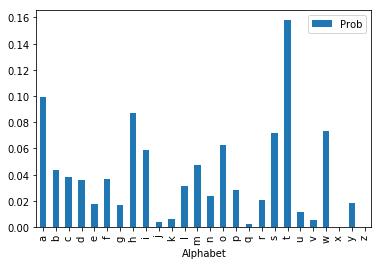

In [56]:
Initial_dist = Initial.div(Initial.sum(axis=0),axis=1)
Initial_dist.columns = ['Prob']

Alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
Initial_dist['Alphabet'] = Alphabet

Initial_dist.plot.bar(x='Alphabet', y='Prob')

Letter **t** has high probability to be the initial letter due to word 'the'.

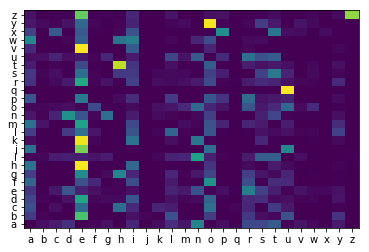

In [74]:
index = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
colname = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

tran_matrix = matrix.div(matrix.sum(axis=1),axis=0)
tran_matrix.columns = colname
tran_matrix['Index'] = index
tran_matrix = tran_matrix.set_index('Index')

# For illustration purpose, we need to trim the probability
tran_matrix2 = tran_matrix.clip(0,0.5)

plt.pcolor(tran_matrix2)
plt.yticks(np.arange(0.5, len(df.index), 1), tran_matrix2.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), tran_matrix2.columns)
plt.show()

Some insights:
- If you sum up by columns, the highest value will be column 'e', indicates many alphabets are followed by 'e'. The other high frequency letters are 'a', 'i', 'o', 'u', which are vowel letters. Isn't it obvious?
- In column 'e', the highest probabilty comes from row 'v', the reason is **VERY** obvious. 
- On the other hand, the probability to transit to letters like 'j', 'q' is low.
- For most of times, q is followed by u, I guess it's due to high frequency words like 'quite', 'quick', 'quiet'.
- 'z' has the highest self transition probability
- 't' is usually followed by 'h', due to words like 'the', 'that', 'there'...
- ...

## Something more...
Here shows a very simple way to encode your message.

In [33]:
# Set the seed for random index
np.random.seed(211)
ind = np.random.choice(26,26,replace=False)

#Create a dictionary for the cypher
alp2 = list(alp)
new_alp = [None]*26
for i in range(len(alp)):
    new_alp[i] = alp[ind[i]]
    
dictionary = dict(zip(alp2,new_alp))

In [34]:
# Encode dictionary
dictionary

{'a': 'i',
 'b': 'x',
 'c': 'w',
 'd': 'f',
 'e': 'u',
 'f': 'v',
 'g': 'b',
 'h': 'n',
 'i': 'a',
 'j': 's',
 'k': 'p',
 'l': 't',
 'm': 'd',
 'n': 'c',
 'o': 'r',
 'p': 'h',
 'q': 'o',
 'r': 'j',
 's': 'm',
 't': 'q',
 'u': 'l',
 'v': 'k',
 'w': 'e',
 'x': 'y',
 'y': 'z',
 'z': 'g'}

In [36]:
test_text = 'some text your want to encode'

# Initialize the encoded text 
translated_text =""

for s in test_text:
    if s in dictionary:
        translated_text +=dictionary[s]
    else:
        translated_text +=s

#Print encoded text
translated_text

'mrdu quyq zrlj eicq qr ucwrfu'

This kind of cypher is simple and easy to crack. If the encoded text is long enough, we could simply use the word frequency dataframe, initial character distribution, and character transition matrix to decipher it.
- For example, use the initial distribution to find t, some other high frequency letters could be a, h, s, w...
- Use transition matrix you can find a, e, i, o, u easily
- If you are familiar with alphabet transition matrix, it's not hard to target z, q, j, x ... you are half way done!

## Markov model in real business world
Markov model and stochastic process have been used widely in many fields in real business world.<br>
<br>
For example, I used to apply the markov transition matrix to analyze the company homepage traffic data. It can help you identify how people transit from one page to another, if there are some pages have potential issues to convert a viewer into a user in couple steps. This information can help you to re-design and optimize the homepage.